In [167]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
folder_path = 'mouseTrackingData'

csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
dataframes = [pd.read_csv(file) for file in csv_files]
# filenames = [os.path.basename(file) for file in csv_files]


In [168]:
dataframes[0]

,id,round,trial,version,timestamp,frame,relative_time,mouse_x,mouse_y,mouse_dx,mouse_dy,phase,event
0,1085,0,1,lld,14:12:59.280,3701,0.020,0.068,-0.100,0.0,0.0,waitingForTarget,middleTargetClick
1,1085,0,1,lld,14:12:59.343,3702,0.083,0.068,-0.100,0.0,0.0,waitingForTarget,noEvent
2,1085,0,1,lld,14:12:59.352,3703,0.093,0.068,-0.100,0.0,0.0,waitingForTarget,noEvent
3,1085,0,1,lld,14:12:59.357,3704,0.101,0.068,-0.100,0.0,0.0,waitingForTarget,noEvent
4,1085,0,1,lld,14:12:59.373,3705,0.117,0.068,-0.100,0.0,0.0,waitingForTarget,noEvent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96417,1085,16,60,lld,15:14:09.993,223573,0.951,2.680,0.051,0.0,0.0,onTarget,noEvent
96418,1085,16,60,lld,15:14:10.010,223574,0.967,2.681,0.051,0.0,0.0,onTarget,noEvent
96419,1085,16,60,lld,15:14:10.027,223575,0.983,2.681,0.051,0.0,0.0,onTarget,noEvent
96420,1085,16,60,lld,15:14:10.044,223576,1.000,2.681,0.051,0.0,0.0,onTarget,noEvent


In [169]:
cleaned_dataframes = []

for df in dataframes:
    df_cleaned = df[df['phase'] != 'waitingForTarget']                         # Phase-Filter
    df_cleaned = df_cleaned[(df_cleaned['round'] >= 1) & (df_cleaned['round'] <= 8)]  # Runden 1–8 behalten
    df_cleaned = df_cleaned.reset_index(drop=True)
    cleaned_dataframes.append(df_cleaned)


In [170]:
cleaned_dataframes[0].head()

,id,round,trial,version,timestamp,frame,relative_time,mouse_x,mouse_y,mouse_dx,mouse_dy,phase,event
0,1085,1,1,lld,14:14:14.373,8156,0.016,0.084,-0.079,0.0,0.0,activeTracking,targetAppeared
1,1085,1,1,lld,14:14:14.390,8157,0.033,0.084,-0.079,0.0,0.0,activeTracking,noEvent
2,1085,1,1,lld,14:14:14.409,8158,0.051,0.084,-0.079,0.0,0.0,activeTracking,noEvent
3,1085,1,1,lld,14:14:14.425,8159,0.069,0.084,-0.079,0.0,0.0,activeTracking,noEvent
4,1085,1,1,lld,14:14:14.440,8160,0.084,0.084,-0.079,0.0,0.0,activeTracking,noEvent


In [171]:
cleaned_dataframes[0]

,id,round,trial,version,timestamp,frame,relative_time,mouse_x,mouse_y,mouse_dx,mouse_dy,phase,event
0,1085,1,1,lld,14:14:14.373,8156,0.016,0.084,-0.079,0.0,0.0,activeTracking,targetAppeared
1,1085,1,1,lld,14:14:14.390,8157,0.033,0.084,-0.079,0.0,0.0,activeTracking,noEvent
2,1085,1,1,lld,14:14:14.409,8158,0.051,0.084,-0.079,0.0,0.0,activeTracking,noEvent
3,1085,1,1,lld,14:14:14.425,8159,0.069,0.084,-0.079,0.0,0.0,activeTracking,noEvent
4,1085,1,1,lld,14:14:14.440,8160,0.084,0.084,-0.079,0.0,0.0,activeTracking,noEvent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35099,1085,8,60,lld,14:44:01.441,115133,1.148,-2.610,0.037,0.0,0.0,onTarget,noEvent
35100,1085,8,60,lld,14:44:01.459,115134,1.165,-2.610,0.037,0.0,0.0,onTarget,noEvent
35101,1085,8,60,lld,14:44:01.477,115135,1.183,-2.610,0.037,0.0,0.0,onTarget,noEvent
35102,1085,8,60,lld,14:44:01.495,115136,1.202,-2.610,0.037,0.0,0.0,onTarget,noEvent


### Blöcke nach round und trial gruppieren (eine zeile enthält einen trial)

In [172]:
all_grouped_df = []
for dataframe in cleaned_dataframes:
    df_grouped = dataframe.groupby(['round', 'trial']).agg({
        'timestamp': list,
        'mouse_x': list,
        'mouse_y': list,
        'version': 'first',  # Falls du version behalten willst
        'id': 'first'
    }).reset_index()

    all_grouped_df.append(df_grouped)

In [173]:
all_grouped_df[0]

,round,trial,timestamp,mouse_x,mouse_y,version,id
0,1,1,"[14:14:14.373, 14:14:14.390, 14:14:14.409, 14:...","[0.084, 0.084, 0.084, 0.084, 0.084, 0.084, 0.0...","[-0.079, -0.079, -0.079, -0.079, -0.079, -0.07...",lld,1085
1,1,2,"[14:14:18.273, 14:14:18.289, 14:14:18.307, 14:...","[0.101, 0.101, 0.101, 0.101, 0.101, 0.101, 0.1...","[0.023, 0.023, 0.023, 0.023, 0.023, 0.023, 0.0...",lld,1085
2,1,3,"[14:14:21.623, 14:14:21.639, 14:14:21.657, 14:...","[0.236, 0.236, 0.225, 0.221, 0.22, 0.219, 0.20...","[0.006, 0.006, -0.006, -0.009, -0.011, -0.011,...",lld,1085
3,1,4,"[14:14:25.489, 14:14:25.507, 14:14:25.523, 14:...","[0.016, 0.039, 0.047, 0.049, 0.073, 0.08, 0.11...","[0.175, 0.175, 0.175, 0.175, 0.175, 0.175, 0.1...",lld,1085
4,1,5,"[14:14:30.040, 14:14:30.056, 14:14:30.073, 14:...","[0.101, 0.101, 0.101, 0.112, 0.116, 0.117, 0.1...","[-0.062, -0.062, -0.062, -0.062, -0.062, -0.06...",lld,1085
...,...,...,...,...,...,...,...
475,8,56,"[14:43:43.159, 14:43:43.175, 14:43:43.191, 14:...","[-0.136, -0.125, -0.098, -0.022, 0.026, 0.042,...","[0.117, 0.117, 0.117, 0.117, 0.106, 0.102, 0.1...",lld,1085
476,8,57,"[14:43:48.209, 14:43:48.225, 14:43:48.245, 14:...","[-0.241, -0.351, -0.433, -0.528, -0.605, -0.64...","[-0.136, -0.136, -0.136, -0.136, -0.136, -0.13...",lld,1085
477,8,58,"[14:43:51.614, 14:43:51.624, 14:43:51.641, 14:...","[-0.3, -0.303, -0.327, -0.335, -0.36, -0.391, ...","[-0.018, -0.018, -0.018, -0.018, -0.018, -0.02...",lld,1085
478,8,59,"[14:43:55.442, 14:43:55.460, 14:43:55.475, 14:...","[0.134, 0.134, 0.134, 0.134, 0.134, 0.123, 0.1...","[-0.036, -0.035, -0.035, -0.035, -0.035, -0.03...",lld,1085


### Normalisieren auf 0/0

In [174]:
def normalize_positions(row):
    # Normalisieren (Startpunkt auf 0,0 setzen)
    x_positions = np.array(row["mouse_x"])
    y_positions = np.array(row["mouse_y"])
    
    x_start, y_start = x_positions[0], y_positions[0]
    x_norm = x_positions - x_start
    y_norm = y_positions - y_start

    row["mouse_x"] = x_norm
    row["mouse_y"] = y_norm

    return row


In [175]:
processed_dataframes = []
for df in all_grouped_df:
    df_processed = df.apply(normalize_positions, axis=1)
    processed_dataframes.append(df_processed)

In [176]:
processed_dataframes[0]

,round,trial,timestamp,mouse_x,mouse_y,version,id
0,1,1,"[14:14:14.373, 14:14:14.390, 14:14:14.409, 14:...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lld,1085
1,1,2,"[14:14:18.273, 14:14:18.289, 14:14:18.307, 14:...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lld,1085
2,1,3,"[14:14:21.623, 14:14:21.639, 14:14:21.657, 14:...","[0.0, 0.0, -0.010999999999999982, -0.014999999...","[0.0, 0.0, -0.012, -0.015, -0.017, -0.017, -0....",lld,1085
3,1,4,"[14:14:25.489, 14:14:25.507, 14:14:25.523, 14:...","[0.0, 0.023, 0.031, 0.033, 0.05699999999999999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.011999999999...",lld,1085
4,1,5,"[14:14:30.040, 14:14:30.056, 14:14:30.073, 14:...","[0.0, 0.0, 0.0, 0.010999999999999996, 0.015, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lld,1085
...,...,...,...,...,...,...,...
475,8,56,"[14:43:43.159, 14:43:43.175, 14:43:43.191, 14:...","[0.0, 0.01100000000000001, 0.03800000000000000...","[0.0, 0.0, 0.0, 0.0, -0.01100000000000001, -0....",lld,1085
476,8,57,"[14:43:48.209, 14:43:48.225, 14:43:48.245, 14:...","[0.0, -0.10999999999999999, -0.192, -0.2870000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lld,1085
477,8,58,"[14:43:51.614, 14:43:51.624, 14:43:51.641, 14:...","[0.0, -0.0030000000000000027, -0.0270000000000...","[0.0, 0.0, 0.0, 0.0, 0.0, -0.01100000000000000...",lld,1085
478,8,59,"[14:43:55.442, 14:43:55.460, 14:43:55.475, 14:...","[0.0, 0.0, 0.0, 0.0, 0.0, -0.01100000000000001...","[0.0, 0.000999999999999994, 0.0009999999999999...",lld,1085


### Euklidische distanz ausrechnen und als spalte hinzufügen: 

In [177]:
def calculate_euclidean_distances(row):
    x = row['mouse_x']
    y = row['mouse_y']
    dx = np.diff(x)
    dy = np.diff(y)
    dist = np.sqrt(dx**2 + dy**2)
    return np.insert(dist, 0, 0.0)  # Schrittweiten, erste ist 0


In [178]:
processed_dataframes[48].iloc[:50] # da sind machneche mouse_x keine arrays, sondern einfach nur 0.0

,round,trial,timestamp,mouse_x,mouse_y,version,id
0,1,1,"[02:04:00.614, 02:04:00.638, 02:04:00.661, 02:...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",rld,9902
1,1,2,"[02:04:10.416, 02:04:10.449, 02:04:10.483, 02:...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",rld,9902
2,1,3,"[02:04:13.382, 02:04:13.415, 02:04:13.448, 02:...","[0.0, 0.0, 0.0, 0.0, -0.011000000000000003, -0...","[0.0, 0.0, 0.0, 0.0, -0.01100000000000001, -0....",rld,9902
3,1,4,"[02:04:16.747, 02:04:16.780, 02:04:16.814, 02:...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",rld,9902
4,1,5,"[02:04:20.313, 02:04:20.346, 02:04:20.379, 02:...","[0.0, 0.0, 0.0, 0.01100000000000001, 0.1050000...","[0.0, 0.0, 0.0, -0.012, -0.027, -0.032, -0.033...",rld,9902
5,1,6,"[02:04:27.377, 02:04:27.410, 02:04:27.443, 02:...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",rld,9902
6,1,7,"[02:04:30.810, 02:04:30.843, 02:04:30.876, 02:...","[0.0, -0.049999999999999996, -0.123, -0.147, -...","[0.0, -0.034, -0.09, -0.109, -0.11499999999999...",rld,9902
7,1,8,"[02:04:35.374, 02:04:35.407, 02:04:35.440, 02:...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.045, -0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0119999999999...",rld,9902
8,1,9,"[02:04:43.005, 02:04:43.038, 02:04:43.071, 02:...","[0.0, 0.0, 0.0, -0.01100000000000001, -0.01500...","[0.0, 0.0, -0.011, -0.026, -0.0310000000000000...",rld,9902
9,1,10,"[02:04:48.337, 02:04:48.370, 02:04:48.403, 02:...","[0.0, -0.007000000000000006, -0.00900000000000...","[0.0, -0.004999999999999999, -0.00700000000000...",rld,9902


In [179]:
# die mal rausschmeißen
def is_valid_array(val):
    import numpy as np
    if not isinstance(val, np.ndarray):
        return False
    try:
        return len(val) > 1
    except TypeError:
        return False

# Liste aus gefilterten DataFrames erzeugen
processed_dataframes_clean = []

for df in processed_dataframes:
    df_clean = df[df.apply(lambda row: is_valid_array(row['mouse_x']) and is_valid_array(row['mouse_y']), axis=1)]
    processed_dataframes_clean.append(df_clean)



In [180]:
for df in processed_dataframes_clean: 
    df['euk_dist'] = df.apply(calculate_euclidean_distances, axis=1)

C:\Users\m_uel\AppData\Local\Temp\ipykernel_11320\13536125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['euk_dist'] = df.apply(calculate_euclidean_distances, axis=1)
C:\Users\m_uel\AppData\Local\Temp\ipykernel_11320\13536125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['euk_dist'] = df.apply(calculate_euclidean_distances, axis=1)
C:\Users\m_uel\AppData\Local\Temp\ipykernel_11320\13536125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [181]:
print(processed_dataframes_clean[0]["mouse_x"][0])
print(processed_dataframes_clean[0]["mouse_y"][0])
print(processed_dataframes_clean[0]["euk_dist"][0])

[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.    -0.123
 -0.491 -0.931 -1.317 -1.527 -1.632 -1.667 -1.702 -1.749 -1.857 -1.963
 -2.104 -2.21  -2.257 -2.285 -2.294 -2.297 -2.298 -2.299 -2.299 -2.299
 -2.299 -2.299 -2.299 -2.299 -2.323 -2.33  -2.357 -2.413 -2.468 -2.51
 -2.524 -2.553 -2.562 -2.565 -2.566 -2.567 -2.567 -2.567 -2.567 -2.567
 -2.567 -2.567 -2.567 -2.567 -2.567 -2.567 -2.567 -2.567]
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.001
 0.001 0.001 0.001 0.012 0.016 0.052 0.087 0.122 0.133 0.16  0.169 0.172
 0.173 0.174 0.174 0.174 0.174 0.174 0.174 0.174 0.174 0.174 0.174 0.175
 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175
 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.  

In [182]:
processed_dataframes_clean[0]

,round,trial,timestamp,mouse_x,mouse_y,version,id,euk_dist
0,1,1,"[14:14:14.373, 14:14:14.390, 14:14:14.409, 14:...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lld,1085,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,2,"[14:14:18.273, 14:14:18.289, 14:14:18.307, 14:...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lld,1085,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1,3,"[14:14:21.623, 14:14:21.639, 14:14:21.657, 14:...","[0.0, 0.0, -0.010999999999999982, -0.014999999...","[0.0, 0.0, -0.012, -0.015, -0.017, -0.017, -0....",lld,1085,"[0.0, 0.0, 0.016278820596099693, 0.00500000000..."
3,1,4,"[14:14:25.489, 14:14:25.507, 14:14:25.523, 14:...","[0.0, 0.023, 0.031, 0.033, 0.05699999999999999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.011999999999...",lld,1085,"[0.0, 0.023, 0.008, 0.0020000000000000018, 0.0..."
4,1,5,"[14:14:30.040, 14:14:30.056, 14:14:30.073, 14:...","[0.0, 0.0, 0.0, 0.010999999999999996, 0.015, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lld,1085,"[0.0, 0.0, 0.0, 0.010999999999999996, 0.004000..."
...,...,...,...,...,...,...,...,...
475,8,56,"[14:43:43.159, 14:43:43.175, 14:43:43.191, 14:...","[0.0, 0.01100000000000001, 0.03800000000000000...","[0.0, 0.0, 0.0, 0.0, -0.01100000000000001, -0....",lld,1085,"[0.0, 0.01100000000000001, 0.02699999999999999..."
476,8,57,"[14:43:48.209, 14:43:48.225, 14:43:48.245, 14:...","[0.0, -0.10999999999999999, -0.192, -0.2870000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lld,1085,"[0.0, 0.10999999999999999, 0.08200000000000002..."
477,8,58,"[14:43:51.614, 14:43:51.624, 14:43:51.641, 14:...","[0.0, -0.0030000000000000027, -0.0270000000000...","[0.0, 0.0, 0.0, 0.0, 0.0, -0.01100000000000000...",lld,1085,"[0.0, 0.0030000000000000027, 0.024000000000000..."
478,8,59,"[14:43:55.442, 14:43:55.460, 14:43:55.475, 14:...","[0.0, 0.0, 0.0, 0.0, 0.0, -0.01100000000000001...","[0.0, 0.000999999999999994, 0.0009999999999999...",lld,1085,"[0.0, 0.000999999999999994, 0.0, 0.0, 0.0, 0.0..."


In [183]:
import pandas as pd
import numpy as np
from datetime import datetime

def calculate_speed(row, window_ms=5):
    timestamps = row['timestamp']  # Liste von Strings, z.B. ['14:14:14.373', '14:14:14.390', ...]
    euk_dist = row['euk_dist']     # Array von Distanzen zwischen aufeinanderfolgenden Messpunkten

    # 1. Timestamps in datetime-Objekte umwandeln (nur Zeit, ohne Datum)
    times = [datetime.strptime(ts, '%H:%M:%S.%f') for ts in timestamps]

    # 2. Zeitdifferenzen in Millisekunden zum Startzeitpunkt berechnen
    start_time = times[0]
    elapsed_ms = np.array([(t - start_time).total_seconds() * 1000 for t in times])

    # 3. Fenster-IDs zuweisen (jeder Zeitstempel kommt in ein Fenster von 0-5ms, 5-10ms, ...)
    window_ids = (elapsed_ms // window_ms).astype(int)

    # 4. Für jedes Fenster die Summe der euklidischen Distanzen berechnen
    # Achtung: euk_dist hat vermutlich eine Länge = len(timestamps), evtl. Off-by-One, 
    # falls euk_dist Distanzen zwischen Messpunkten sind, dann hat euk_dist = len(timestamps) - 1
    # Darum passen wir window_ids an:
    if len(euk_dist) == len(timestamps):
        dist_to_sum = np.array(euk_dist)
    elif len(euk_dist) == len(timestamps) - 1:
        dist_to_sum = np.array(euk_dist)
        window_ids = window_ids[:-1]  # letztes Zeitfenster fällt raus, weil keine Distanz danach
    else:
        raise ValueError("Längen von timestamps und euk_dist passen nicht zusammen")

    # Summe pro Fenster
    import collections
    dist_per_window = collections.defaultdict(float)
    for w_id, dist in zip(window_ids, dist_to_sum):
        dist_per_window[w_id] += dist

    # 5. Geschwindigkeit pro Fenster = Distanz / Zeit (Zeit = window_ms ms = window_ms / 1000 s)
    speed_per_window = {w: dist / (window_ms / 1000) for w, dist in dist_per_window.items()}

    # 6. Optional: Ergebnis als Liste zurückgeben, sortiert nach Fenster-ID
    max_window = max(window_ids)
    speeds = [speed_per_window.get(i, 0) for i in range(max_window + 1)]

    return speeds


In [184]:
for df in processed_dataframes_clean: 
    df['speed'] = df.apply(calculate_speed, axis=1)

C:\Users\m_uel\AppData\Local\Temp\ipykernel_11320\346539566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['speed'] = df.apply(calculate_speed, axis=1)
C:\Users\m_uel\AppData\Local\Temp\ipykernel_11320\346539566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['speed'] = df.apply(calculate_speed, axis=1)
C:\Users\m_uel\AppData\Local\Temp\ipykernel_11320\346539566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [185]:
processed_dataframes_clean[0]

,round,trial,timestamp,mouse_x,mouse_y,version,id,euk_dist,speed
0,1,1,"[14:14:14.373, 14:14:14.390, 14:14:14.409, 14:...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lld,1085,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0, 0, 0.0, 0, 0, 0, 0.0, 0, 0, 0.0, 0, 0..."
1,1,2,"[14:14:18.273, 14:14:18.289, 14:14:18.307, 14:...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lld,1085,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0, 0, 0.0, 0, 0, 0.0, 0, 0, 0, 0.0, 0, 0..."
2,1,3,"[14:14:21.623, 14:14:21.639, 14:14:21.657, 14:...","[0.0, 0.0, -0.010999999999999982, -0.014999999...","[0.0, 0.0, -0.012, -0.015, -0.017, -0.017, -0....",lld,1085,"[0.0, 0.0, 0.016278820596099693, 0.00500000000...","[0.0, 0, 0, 0.0, 0, 0, 3.2557641192199385, 0, ..."
3,1,4,"[14:14:25.489, 14:14:25.507, 14:14:25.523, 14:...","[0.0, 0.023, 0.031, 0.033, 0.05699999999999999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.011999999999...",lld,1085,"[0.0, 0.023, 0.008, 0.0020000000000000018, 0.0...","[0.0, 0, 0, 4.6, 0, 0, 1.6, 0, 0, 0, 0.4000000..."
4,1,5,"[14:14:30.040, 14:14:30.056, 14:14:30.073, 14:...","[0.0, 0.0, 0.0, 0.010999999999999996, 0.015, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lld,1085,"[0.0, 0.0, 0.0, 0.010999999999999996, 0.004000...","[0.0, 0, 0, 0.0, 0, 0, 0.0, 0, 0, 2.1999999999..."
...,...,...,...,...,...,...,...,...,...
475,8,56,"[14:43:43.159, 14:43:43.175, 14:43:43.191, 14:...","[0.0, 0.01100000000000001, 0.03800000000000000...","[0.0, 0.0, 0.0, 0.0, -0.01100000000000001, -0....",lld,1085,"[0.0, 0.01100000000000001, 0.02699999999999999...","[0.0, 0, 0, 2.200000000000002, 0, 0, 5.3999999..."
476,8,57,"[14:43:48.209, 14:43:48.225, 14:43:48.245, 14:...","[0.0, -0.10999999999999999, -0.192, -0.2870000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lld,1085,"[0.0, 0.10999999999999999, 0.08200000000000002...","[0.0, 0, 0, 21.999999999999996, 0, 0, 0, 16.40..."
477,8,58,"[14:43:51.614, 14:43:51.624, 14:43:51.641, 14:...","[0.0, -0.0030000000000000027, -0.0270000000000...","[0.0, 0.0, 0.0, 0.0, 0.0, -0.01100000000000000...",lld,1085,"[0.0, 0.0030000000000000027, 0.024000000000000...","[0.0, 0, 0.6000000000000005, 0, 0, 4.800000000..."
478,8,59,"[14:43:55.442, 14:43:55.460, 14:43:55.475, 14:...","[0.0, 0.0, 0.0, 0.0, 0.0, -0.01100000000000001...","[0.0, 0.000999999999999994, 0.0009999999999999...",lld,1085,"[0.0, 0.000999999999999994, 0.0, 0.0, 0.0, 0.0...","[0.0, 0, 0, 0.1999999999999988, 0, 0, 0.0, 0, ..."


In [186]:
import numpy as np

def interpolate_to_100(speed_list, target_length=100):
    if len(speed_list) == 0:
        return np.zeros(target_length)  # Falls leere Liste, dann nur Nullen

    # Originale x-Werte (Zeitpunkte) der Geschwindigkeiten: 0, 1, 2, ..., len(speed_list)-1
    original_x = np.linspace(0, 1, num=len(speed_list))
    # Neue x-Werte für genau 100 Punkte von 0 bis 1
    target_x = np.linspace(0, 1, num=target_length)

    # Interpolation
    interpolated = np.interp(target_x, original_x, speed_list)
    return interpolated


In [187]:
for df in processed_dataframes_clean: 
    df['speed_interp'] = df['speed'].apply(interpolate_to_100)


C:\Users\m_uel\AppData\Local\Temp\ipykernel_11320\3827625757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['speed_interp'] = df['speed'].apply(interpolate_to_100)
C:\Users\m_uel\AppData\Local\Temp\ipykernel_11320\3827625757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['speed_interp'] = df['speed'].apply(interpolate_to_100)
C:\Users\m_uel\AppData\Local\Temp\ipykernel_11320\3827625757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

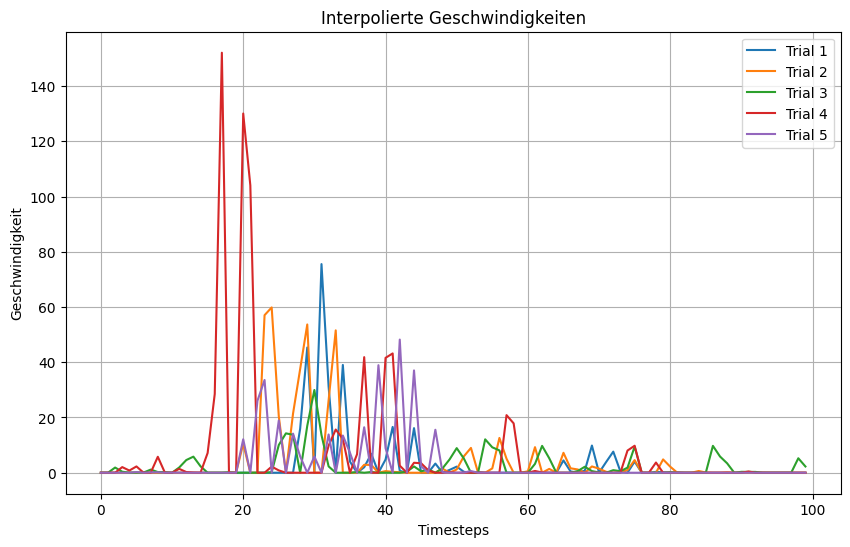

In [188]:
plt.figure(figsize=(10,6))
for i in range(min(5, len(processed_dataframes_clean[0]))):  # z.B. max 5 Trials
    speed_interp = processed_dataframes_clean[0]['speed_interp'].iloc[i]
    plt.plot(np.arange(100), speed_interp, label=f'Trial {i+1}')
plt.xlabel("Timesteps")
plt.ylabel("Geschwindigkeit")
plt.title("Interpolierte Geschwindigkeiten")
plt.legend()
plt.grid(True)
plt.show()


### Nach Condition aufsplitten

In [189]:
df_lld = []
df_rld = []

for df in processed_dataframes_clean:
    version = df.iloc[0]['version'] 
    if version == 'lld':
        df_lld.append(df)
    elif version == 'rld':
        df_rld.append(df)


In [190]:
df_lld[0].head()

,round,trial,timestamp,mouse_x,mouse_y,version,id,euk_dist,speed,speed_interp
0,1,1,"[14:14:14.373, 14:14:14.390, 14:14:14.409, 14:...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lld,1085,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0, 0, 0.0, 0, 0, 0, 0.0, 0, 0, 0.0, 0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,2,"[14:14:18.273, 14:14:18.289, 14:14:18.307, 14:...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lld,1085,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0, 0, 0.0, 0, 0, 0.0, 0, 0, 0, 0.0, 0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1,3,"[14:14:21.623, 14:14:21.639, 14:14:21.657, 14:...","[0.0, 0.0, -0.010999999999999982, -0.014999999...","[0.0, 0.0, -0.012, -0.015, -0.017, -0.017, -0....",lld,1085,"[0.0, 0.0, 0.016278820596099693, 0.00500000000...","[0.0, 0, 0, 0.0, 0, 0, 3.2557641192199385, 0, ...","[0.0, 0.0, 1.8745308565205723, 0.3636363636363..."
3,1,4,"[14:14:25.489, 14:14:25.507, 14:14:25.523, 14:...","[0.0, 0.023, 0.031, 0.033, 0.05699999999999999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.011999999999...",lld,1085,"[0.0, 0.023, 0.008, 0.0020000000000000018, 0.0...","[0.0, 0, 0, 4.6, 0, 0, 1.6, 0, 0, 0, 0.4000000...","[0.0, 0.0, 0.0, 2.0363636363636393, 0.79191919..."
4,1,5,"[14:14:30.040, 14:14:30.056, 14:14:30.073, 14:...","[0.0, 0.0, 0.0, 0.010999999999999996, 0.015, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lld,1085,"[0.0, 0.0, 0.0, 0.010999999999999996, 0.004000...","[0.0, 0, 0, 0.0, 0, 0, 0.0, 0, 0, 2.1999999999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.222222222222217, 0..."


In [191]:
def get_target_pos(row):
    last_x = row['mouse_x'][-1]
    return 'r' if last_x > 0 else 'l'

df['targetPos'] = df.apply(get_target_pos, axis=1)

In [192]:
for i, df in enumerate(df_lld):
    target_pos_series = df.apply(get_target_pos, axis=1)
    df_lld[i] = df.copy() 
    df_lld[i]['targetPos'] = target_pos_series

In [193]:
for i, df in enumerate(df_rld):
    target_pos_series = df.apply(get_target_pos, axis=1)
    df_rld[i] = df.copy()  # sicherstellen, dass es ein DataFrame ist
    df_rld[i]['targetPos'] = target_pos_series

In [194]:
df_lld[0]

,round,trial,timestamp,mouse_x,mouse_y,version,id,euk_dist,speed,speed_interp,targetPos
0,1,1,"[14:14:14.373, 14:14:14.390, 14:14:14.409, 14:...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lld,1085,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0, 0, 0.0, 0, 0, 0, 0.0, 0, 0, 0.0, 0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",l
1,1,2,"[14:14:18.273, 14:14:18.289, 14:14:18.307, 14:...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lld,1085,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0, 0, 0.0, 0, 0, 0.0, 0, 0, 0, 0.0, 0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",r
2,1,3,"[14:14:21.623, 14:14:21.639, 14:14:21.657, 14:...","[0.0, 0.0, -0.010999999999999982, -0.014999999...","[0.0, 0.0, -0.012, -0.015, -0.017, -0.017, -0....",lld,1085,"[0.0, 0.0, 0.016278820596099693, 0.00500000000...","[0.0, 0, 0, 0.0, 0, 0, 3.2557641192199385, 0, ...","[0.0, 0.0, 1.8745308565205723, 0.3636363636363...",l
3,1,4,"[14:14:25.489, 14:14:25.507, 14:14:25.523, 14:...","[0.0, 0.023, 0.031, 0.033, 0.05699999999999999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.011999999999...",lld,1085,"[0.0, 0.023, 0.008, 0.0020000000000000018, 0.0...","[0.0, 0, 0, 4.6, 0, 0, 1.6, 0, 0, 0, 0.4000000...","[0.0, 0.0, 0.0, 2.0363636363636393, 0.79191919...",l
4,1,5,"[14:14:30.040, 14:14:30.056, 14:14:30.073, 14:...","[0.0, 0.0, 0.0, 0.010999999999999996, 0.015, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lld,1085,"[0.0, 0.0, 0.0, 0.010999999999999996, 0.004000...","[0.0, 0, 0, 0.0, 0, 0, 0.0, 0, 0, 2.1999999999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.222222222222217, 0...",r
...,...,...,...,...,...,...,...,...,...,...,...
475,8,56,"[14:43:43.159, 14:43:43.175, 14:43:43.191, 14:...","[0.0, 0.01100000000000001, 0.03800000000000000...","[0.0, 0.0, 0.0, 0.0, -0.01100000000000001, -0....",lld,1085,"[0.0, 0.01100000000000001, 0.02699999999999999...","[0.0, 0, 0, 2.200000000000002, 0, 0, 5.3999999...","[0.0, 1.2545454545454566, 8.137373737373721, 2...",l
476,8,57,"[14:43:48.209, 14:43:48.225, 14:43:48.245, 14:...","[0.0, -0.10999999999999999, -0.192, -0.2870000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lld,1085,"[0.0, 0.10999999999999999, 0.08200000000000002...","[0.0, 0, 0, 21.999999999999996, 0, 0, 0, 16.40...","[0.0, 0.0, 2.222222222222218, 0.0, 3.313131313...",l
477,8,58,"[14:43:51.614, 14:43:51.624, 14:43:51.641, 14:...","[0.0, -0.0030000000000000027, -0.0270000000000...","[0.0, 0.0, 0.0, 0.0, 0.0, -0.01100000000000000...",lld,1085,"[0.0, 0.0030000000000000027, 0.024000000000000...","[0.0, 0, 0.6000000000000005, 0, 0, 4.800000000...","[0.0, 0.0, 0.0, 3.939393939393937, 1.860657606...",r
478,8,59,"[14:43:55.442, 14:43:55.460, 14:43:55.475, 14:...","[0.0, 0.0, 0.0, 0.0, 0.0, -0.01100000000000001...","[0.0, 0.000999999999999994, 0.0009999999999999...",lld,1085,"[0.0, 0.000999999999999994, 0.0, 0.0, 0.0, 0.0...","[0.0, 0, 0, 0.1999999999999988, 0, 0, 0.0, 0, ...","[0.0, 0.19191919191919082, 0.0, 0.0, 0.0, 0.0,...",l


### Jetzt werden die zwei conditions noch nach targetPos aufgesplittet

In [195]:
df_lld_left_target = []
df_lld_right_target = []

for df in df_lld:
    df_left = df[df['targetPos'] == 'l'].reset_index(drop=True)
    df_right = df[df['targetPos'] == 'r'].reset_index(drop=True)
    df_lld_left_target.append(df_left)
    df_lld_right_target.append(df_right)


In [196]:
df_rld_left_target = []
df_rld_right_target = []

for df in df_rld:
    df_left = df[df['targetPos'] == 'l'].reset_index(drop=True)
    df_right = df[df['targetPos'] == 'r'].reset_index(drop=True)
    df_rld_left_target.append(df_left)
    df_rld_right_target.append(df_right)


In [197]:
len(df_rld_left_target)

25

In [198]:
df_rld_left_target[0]

,round,trial,timestamp,mouse_x,mouse_y,version,id,euk_dist,speed,speed_interp,targetPos
0,1,1,"[22:14:50.307, 22:14:50.324, 22:14:50.341, 22:...","[0.0, 0.03499999999999999, 0.081, 0.0959999999...","[0.0, -0.013000000000000012, -0.02900000000000...",rld,1611,"[0.0, 0.037336309405188936, 0.0487031826475437...","[0.0, 0, 0, 7.467261881037787, 0, 0, 9.7406365...","[0.0, 0.980549539934255, 0.0, 5.90341607849014...",l
1,1,2,"[22:14:53.083, 22:14:53.099, 22:14:53.114, 22:...","[0.0, 0.007000000000000006, 0.0100000000000000...","[0.0, -0.0020000000000000018, -0.0020000000000...",rld,1611,"[0.0, 0.007280109889280525, 0.0030000000000000...","[0.0, 0, 0, 1.456021977856105, 0, 0, 0.6000000...","[0.0, 0.0, 0.23531668328987498, 0.454545454545...",l
2,1,5,"[22:15:01.539, 22:15:01.555, 22:15:01.572, 22:...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",rld,1611,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0, 0, 0.0, 0, 0, 0.0, 0, 0, 0, 0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",l
3,1,6,"[22:15:03.605, 22:15:03.622, 22:15:03.647, 22:...","[0.0, -0.07600000000000051, -0.102000000000000...","[0.0, 0.017000000000000015, 0.0620000000000000...",rld,1611,"[0.0, 0.07787810988975065, 0.05197114584074503...","[0.0, 0, 0, 15.57562197795013, 0, 0, 0, 0, 10....","[0.0, 13.530338283875867, 0.0, 1.2704163724591...",l
4,1,7,"[22:15:06.538, 22:15:06.565, 22:15:06.571, 22:...","[0.0, 0.016999999999999904, 0.0219999999999997...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",rld,1611,"[0.0, 0.016999999999999904, 0.0049999999999998...","[0.0, 0, 0, 0, 0, 3.399999999999981, 0.9999999...","[0.0, 0.0, 2.404040404040392, 0.0, 0.165656565...",l
...,...,...,...,...,...,...,...,...,...,...,...
236,8,50,"[22:36:42.909, 22:36:42.926, 22:36:42.942, 22:...","[0.0, 0.16799999999999998, 0.382, 0.6799999999...","[0.0, -0.061000000000000006, -0.127, -0.183, -...",rld,1611,"[0.0, 0.1787316424139833, 0.22394642216387384,...","[0.0, 0, 0, 35.746328482796656, 0, 0, 44.78928...","[0.0, 0.0, 28.163773956142826, 0.0, 25.7877698...",l
237,8,52,"[22:36:47.275, 22:36:47.303, 22:36:47.308, 22:...","[0.0, -0.05500000000000005, -0.084999999999999...","[0.0, -0.0010000000000000009, -0.0010000000000...",rld,1611,"[0.0, 0.05500909015790032, 0.02999999999999991...","[0.0, 0, 0, 0, 0, 11.001818031580065, 5.999999...","[0.0, 0.0, 0.0, 0.0, 6.223250603722062, 7.4651...",l
238,8,54,"[22:36:51.475, 22:36:51.492, 22:36:51.508, 22:...","[0.0, 0.0, 0.0, 0.03399999999999999, 0.0559999...","[0.0, 0.0, 0.0, 0.0, 0.010999999999999996, 0.0...",rld,1611,"[0.0, 0.0, 0.0, 0.03399999999999999, 0.0245967...","[0.0, 0, 0, 0.0, 0, 0, 0.0, 0, 0, 0, 6.7999999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.563...",l
239,8,55,"[22:36:53.236, 22:36:53.251, 22:36:53.267, 22:...","[0.0, 0.01200000000000001, 0.02700000000000002...","[0.0, 0.014999999999999958, 0.0199999999999999...",rld,1611,"[0.0, 0.01920937271229852, 0.01581138830084191...","[0.0, 0, 0, 3.841874542459704, 0, 0, 3.1622776...","[0.0, 0.0, 2.871704203454727, 0.0, 1.565167730...",l


### Durchschnittskurve für jeden Participant

In [199]:
import numpy as np

avg_speed_per_participant_lld_left = []  # Liste von np.arrays mit je 100 Werten

for df in df_lld_left_target:
    # Stacke alle speed_interp arrays zu einer (n_trials x 100) Matrix
    speed_matrix = np.stack(df['speed_interp'].values)
    
    # Mittelwert über alle Trials (Zeilen) → ergibt ein 100-Längen-Array
    mean_speed = np.mean(speed_matrix, axis=0)
    
    avg_speed_per_participant_lld_left.append(mean_speed)


In [200]:
import numpy as np

avg_speed_per_participant_lld_right = []  # Liste von np.arrays mit je 100 Werten

for df in df_lld_right_target:
    # Stacke alle speed_interp arrays zu einer (n_trials x 100) Matrix
    speed_matrix = np.stack(df['speed_interp'].values)
    
    # Mittelwert über alle Trials (Zeilen) → ergibt ein 100-Längen-Array
    mean_speed = np.mean(speed_matrix, axis=0)
    
    avg_speed_per_participant_lld_right.append(mean_speed)


In [201]:
import numpy as np

avg_speed_per_participant_rld_left = []  # Liste von np.arrays mit je 100 Werten

for df in df_rld_left_target:
    # Stacke alle speed_interp arrays zu einer (n_trials x 100) Matrix
    speed_matrix = np.stack(df['speed_interp'].values)
    
    # Mittelwert über alle Trials (Zeilen) → ergibt ein 100-Längen-Array
    mean_speed = np.mean(speed_matrix, axis=0)
    
    avg_speed_per_participant_rld_left.append(mean_speed)


In [202]:
import numpy as np

avg_speed_per_participant_rld_right = []  # Liste von np.arrays mit je 100 Werten

for df in df_rld_right_target:
    # Stacke alle speed_interp arrays zu einer (n_trials x 100) Matrix
    speed_matrix = np.stack(df['speed_interp'].values)
    
    # Mittelwert über alle Trials (Zeilen) → ergibt ein 100-Längen-Array
    mean_speed = np.mean(speed_matrix, axis=0)
    
    avg_speed_per_participant_rld_right.append(mean_speed)


In [203]:
avg_speed_per_participant_lld_left[0]

array([ 0.        ,  2.55172516,  3.80460575,  2.96215472,  3.79618757,
        2.76043702,  2.90013819,  2.99980591,  2.82281767,  2.62091408,
        2.97874999,  2.9423776 ,  2.86226474,  2.34034616,  1.81001174,
        2.19749725,  3.41482002,  3.95568943,  3.25638991,  5.50831055,
        6.05806542,  7.79574975,  7.20060928,  7.76039369,  8.21315984,
        9.47230894,  8.17164649,  8.07505932, 11.83041905, 10.30467941,
        9.52289437, 13.42863407,  7.03947315,  8.33056426, 10.89444737,
        7.66698612,  7.96279352,  5.93700332,  5.31784509,  5.9826513 ,
        5.5710858 ,  6.75260815,  5.47133619,  5.47759966,  6.29000287,
        4.38820468,  3.60063544,  4.20647976,  4.28585015,  3.45498257,
        3.48158514,  3.104866  ,  3.28210892,  4.30770647,  2.79329929,
        2.97767011,  2.40672701,  2.48658078,  2.73628174,  2.22195747,
        2.22215486,  1.87348728,  1.94611764,  1.72655258,  2.33930181,
        2.00797894,  2.26811929,  1.84572121,  1.50428442,  2.20

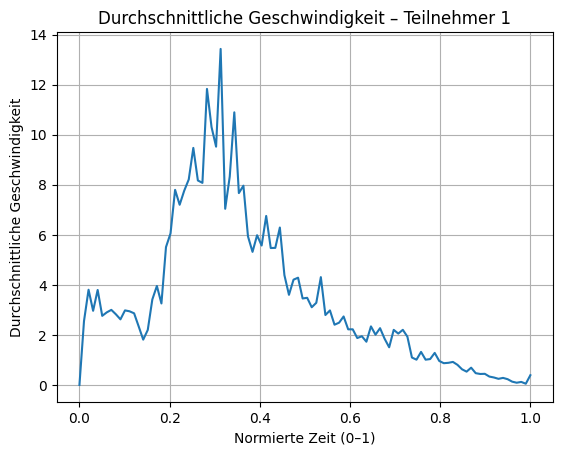

In [204]:
import matplotlib.pyplot as plt

plt.plot(np.linspace(0, 1, 100), avg_speed_per_participant_lld_left[0])
plt.xlabel("Normierte Zeit (0–1)")
plt.ylabel("Durchschnittliche Geschwindigkeit")
plt.title("Durchschnittliche Geschwindigkeit – Teilnehmer 1")
plt.grid(True)
plt.show()


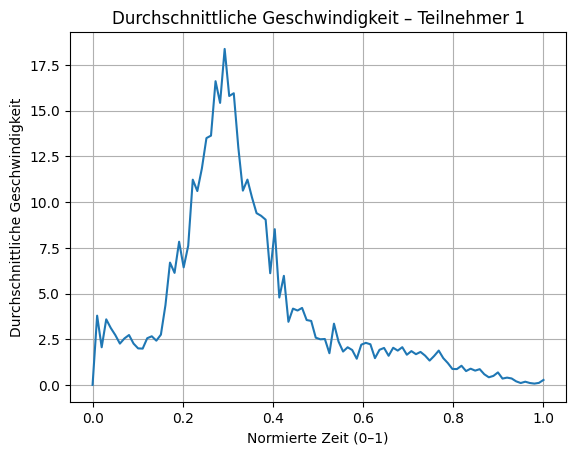

In [205]:
import matplotlib.pyplot as plt

plt.plot(np.linspace(0, 1, 100), avg_speed_per_participant_lld_right[0])
plt.xlabel("Normierte Zeit (0–1)")
plt.ylabel("Durchschnittliche Geschwindigkeit")
plt.title("Durchschnittliche Geschwindigkeit – Teilnehmer 1")
plt.grid(True)
plt.show()


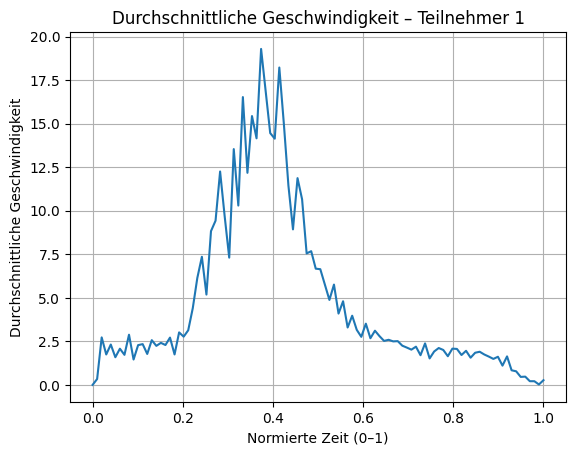

In [206]:
import matplotlib.pyplot as plt

plt.plot(np.linspace(0, 1, 100), avg_speed_per_participant_rld_left[0])
plt.xlabel("Normierte Zeit (0–1)")
plt.ylabel("Durchschnittliche Geschwindigkeit")
plt.title("Durchschnittliche Geschwindigkeit – Teilnehmer 1")
plt.grid(True)
plt.show()


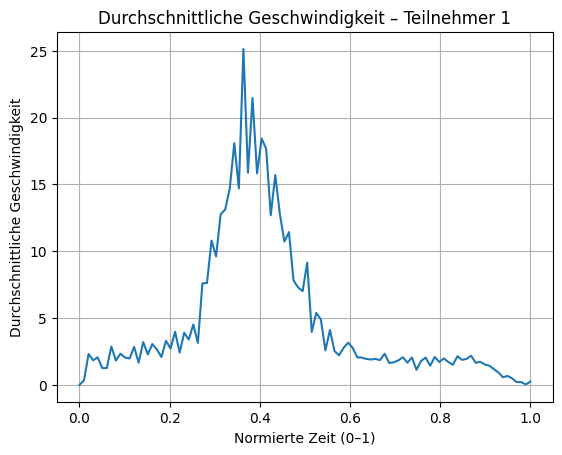

In [207]:
import matplotlib.pyplot as plt

plt.plot(np.linspace(0, 1, 100), avg_speed_per_participant_rld_right[0])
plt.xlabel("Normierte Zeit (0–1)")
plt.ylabel("Durchschnittliche Geschwindigkeit")
plt.title("Durchschnittliche Geschwindigkeit – Teilnehmer 1")
plt.grid(True)
plt.show()


In [209]:
speed_matrix_lld_left = np.stack(avg_speed_per_participant_lld_left)
speed_matrix_lld_right = np.stack(avg_speed_per_participant_lld_right)
speed_matrix_rld_left = np.stack(avg_speed_per_participant_rld_left)
speed_matrix_rld_right = np.stack(avg_speed_per_participant_rld_right)

# Durchschnitt über alle 25 Teilnehmer pro Timestep
mean_speed_lld_left = np.mean(speed_matrix_lld_left, axis=0)
mean_speed_lld_right = np.mean(speed_matrix_lld_right, axis=0)
mean_speed_rld_left = np.mean(speed_matrix_rld_left, axis=0)
mean_speed_rld_right = np.mean(speed_matrix_rld_right, axis=0)


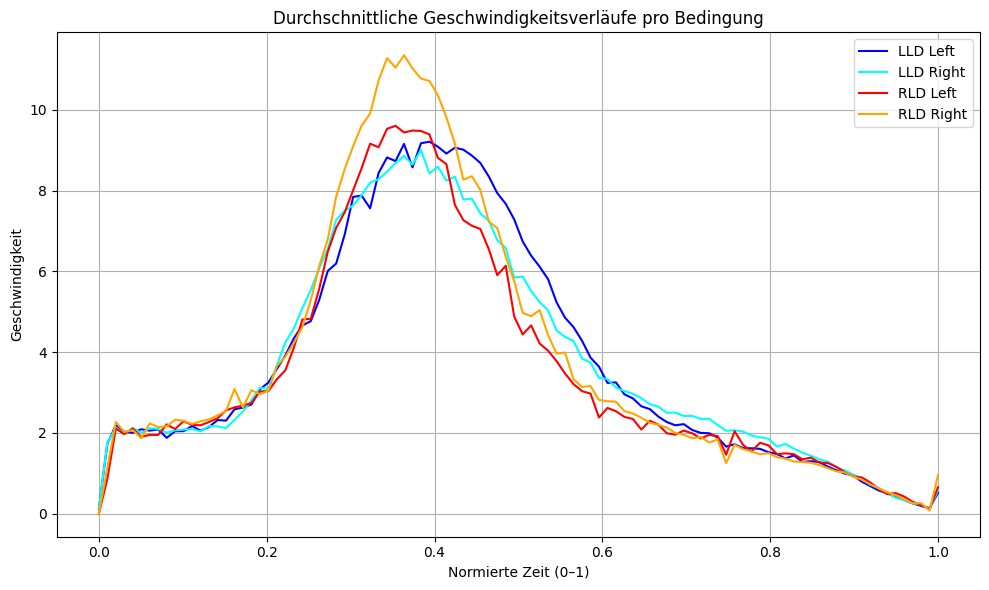

In [210]:
import matplotlib.pyplot as plt
import numpy as np

# Normierte Zeitachse mit 100 Timesteps
timesteps = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 6))

plt.plot(timesteps, mean_speed_lld_left, label="LLD Left", color="blue")
plt.plot(timesteps, mean_speed_lld_right, label="LLD Right", color="cyan")
plt.plot(timesteps, mean_speed_rld_left, label="RLD Left", color="red")
plt.plot(timesteps, mean_speed_rld_right, label="RLD Right", color="orange")

plt.title("Durchschnittliche Geschwindigkeitsverläufe pro Bedingung")
plt.xlabel("Normierte Zeit (0–1)")
plt.ylabel("Geschwindigkeit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [208]:
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm 
# import numpy as np

# plt.figure(figsize=(12, 8))

# num_dfs = len(df_lld)
# colors = cm.tab10(np.linspace(0, 1, num_dfs))
# for i, df in enumerate(df_lld):
#     color = colors[i] 
#     for idx, row in df.iterrows():
#         x = row['mouse_x']
#         y = row['mouse_y']
#         plt.plot(x, y, color=color, alpha=0.7)

# plt.xlabel('mouse_x')
# plt.ylabel('mouse_y')
# plt.title('Mausbewegungen aller LLD-Datasets')
# plt.grid(True)
# plt.show()
